In [1]:
#initalize all packages
import numpy as np
import pandas as pd
import quantecon as qe
import matplotlib.pyplot as plt

import warnings

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy.stats import norm

warnings.filterwarnings('ignore')

In [2]:
#Calculate probability of on top sites with 6 neighbors and store in variable permutations

#Generate all possible 6 element permutations out of a selection of 5 different elements
permutations = pd.DataFrame(columns=['Sequence'])
sequence_len = 5
selection = ['A','B','C','D','E']
for q in range(len(selection)):
    for w in range(len(selection)):
        for e in range(len(selection)):
            for r in range(len(selection)):
                for t in range(len(selection)):
                    for y in range(len(selection)):
                        array = [selection[q],selection[w],selection[e],selection[r],selection[t],selection[y]]
                        permutations = pd.concat([pd.DataFrame([[array]],columns=['Sequence']),permutations])
                        
for i in range(len(selection)):
    permutations[str(selection[i])] = 0
permutations = permutations.reset_index(drop=True)

for i in range(len(permutations)):
    for j in range(len(selection)):
        permutations[str(selection[j])][i] = permutations['Sequence'][i].count(str(selection[j]))

In [3]:
#run all functions to calculate activity distributions
def get_sites_pure(assumed_composition, permutations, index):  
    
    labels = ['A','B','C','D','E']
    index -= 1 
    labels.pop(index)
    select_permutations = permutations.copy()
    select_permutations = select_permutations.loc[select_permutations[labels[0]] == 0]
    select_permutations = select_permutations.loc[select_permutations[labels[1]] == 0]
    select_permutations = select_permutations.loc[select_permutations[labels[2]] == 0]
    select_permutations = select_permutations.loc[select_permutations[labels[3]] == 0].reset_index(drop=True)
    select_permutations['probability'] = 1
    for i in range(len(selection)):
        select_permutations['probability'] *= assumed_composition[i]**select_permutations[str(selection[i])]
        
    return select_permutations['probability'].sum()*assumed_composition[index] 

def get_sites_binary(assumed_composition, permutations, index):  
    
    labels = ['A','B','C','D','E']
    index -= 1 
    labels.pop(index)    
    probability = 0
    for n,label in enumerate(labels):
        select_permutations = permutations.copy()
        for k in range(4):
            if(k == n):
                select_permutations = select_permutations.loc[select_permutations[labels[k]] > 0].reset_index(drop=True)
            else:
                select_permutations = select_permutations.loc[select_permutations[labels[k]] == 0].reset_index(drop=True)
        select_permutations['probability'] = 1        
        for i in range(len(selection)):
            select_permutations['probability'] *= assumed_composition[i]**select_permutations[str(selection[i])]
        
        probability += select_permutations['probability'].sum()*assumed_composition[index] 
    return probability

def get_sites_ternary(assumed_composition, permutations, index):  
    
    labels = ['A','B','C','D','E']
    index -= 1 
    labels.pop(index)    
    probability = 0
    for n in range(3):
        for m in range(n+1):
            select_permutations = permutations.copy()
            for k in range(4):
                if(k == n+1 or k==m):
                    select_permutations = select_permutations.loc[select_permutations[labels[k]] > 0].reset_index(drop=True)
                else:
                    select_permutations = select_permutations.loc[select_permutations[labels[k]] == 0].reset_index(drop=True)
            select_permutations['probability'] = 1        
            for i in range(len(selection)):
                select_permutations['probability'] *= assumed_composition[i]**select_permutations[str(selection[i])]

            probability += select_permutations['probability'].sum()*assumed_composition[index] 
    return probability

def get_sites_quaternary(assumed_composition, permutations, index):  
    
    labels = ['A','B','C','D','E']
    index -= 1 
    labels.pop(index)    
    probability = 0
    for n,label in enumerate(labels):
        select_permutations = permutations.copy()
        for k in range(4):
            if(k == n):
                select_permutations = select_permutations.loc[select_permutations[labels[k]] == 0].reset_index(drop=True)
            else:
                select_permutations = select_permutations.loc[select_permutations[labels[k]] > 0].reset_index(drop=True)
        select_permutations['probability'] = 1        
        for i in range(len(selection)):
            select_permutations['probability'] *= assumed_composition[i]**select_permutations[str(selection[i])]
        
        probability += select_permutations['probability'].sum()*assumed_composition[index] 
    return probability

def get_sites_quinary(assumed_composition, permutations, index):  
      
    labels = ['A','B','C','D','E']
    index -= 1 
    labels.pop(index)
    select_permutations = permutations.copy()
    select_permutations = select_permutations.loc[select_permutations[labels[0]] > 0]
    select_permutations = select_permutations.loc[select_permutations[labels[1]] > 0]
    select_permutations = select_permutations.loc[select_permutations[labels[2]] > 0]
    select_permutations = select_permutations.loc[select_permutations[labels[3]] > 0].reset_index(drop=True)
    select_permutations['probability'] = 1
    for i in range(len(selection)):
        select_permutations['probability'] *= assumed_composition[i]**select_permutations[str(selection[i])]
        
    return select_permutations['probability'].sum()*assumed_composition[index] 

def get_sites_pure_A(assumed_composition, permutations, index):  
    
    labels = ['A','B','C','D','E']
    index -= 1 
    labels.pop(index)
    select_permutations = permutations.copy()
    select_permutations = select_permutations.loc[select_permutations[labels[0]] == 0]
    select_permutations = select_permutations.loc[select_permutations[labels[1]] == 0]
    select_permutations = select_permutations.loc[select_permutations[labels[2]] == 0]
    select_permutations = select_permutations.loc[select_permutations[labels[3]] == 0].reset_index(drop=True)
    select_permutations['probability'] = 1
    for i in range(len(selection)):
        select_permutations['probability'] *= assumed_composition[i]**select_permutations[str(selection[i])]
        
    return select_permutations['probability'].sum()*assumed_composition[index] 

def get_sites_binary_A(assumed_composition, permutations, index):  
    
    labels = ['A','B','C','D','E']
    index -= 1 
    labels.pop(index)    
    probability = 0
    
    select_permutations = permutations.copy()
    for k in range(4):
        if(k == 0):
            select_permutations = select_permutations.loc[select_permutations[labels[k]] > 0].reset_index(drop=True)
        else:
            select_permutations = select_permutations.loc[select_permutations[labels[k]] == 0].reset_index(drop=True)
    select_permutations['probability'] = 1        
    for i in range(len(selection)):
        select_permutations['probability'] *= assumed_composition[i]**select_permutations[str(selection[i])]

    probability += select_permutations['probability'].sum()*assumed_composition[index] 
    return probability

def get_sites_ternary_A(assumed_composition, permutations, index):  
    
    labels = ['A','B','C','D','E']
    index -= 1 
    labels.pop(index)    
    probability = 0

    select_permutations = permutations.copy()
    for k in range(4):
        if(k <= 1):
            select_permutations = select_permutations.loc[select_permutations[labels[k]] > 0].reset_index(drop=True)
        else:
            select_permutations = select_permutations.loc[select_permutations[labels[k]] == 0].reset_index(drop=True)
    select_permutations['probability'] = 1        
    for i in range(len(selection)):
        select_permutations['probability'] *= assumed_composition[i]**select_permutations[str(selection[i])]

    probability += select_permutations['probability'].sum()*assumed_composition[index] 
    return probability

def get_sites_quaternary_A(assumed_composition, permutations, index):  
    
    labels = ['A','B','C','D','E']
    index -= 1 
    labels.pop(index)    
    probability = 0

    select_permutations = permutations.copy()
    for k in range(4):
        if(k <= 2):
            select_permutations = select_permutations.loc[select_permutations[labels[k]] > 0].reset_index(drop=True)
        else:
            select_permutations = select_permutations.loc[select_permutations[labels[k]] == 0].reset_index(drop=True)
    select_permutations['probability'] = 1        
    for i in range(len(selection)):
        select_permutations['probability'] *= assumed_composition[i]**select_permutations[str(selection[i])]
        
    probability += select_permutations['probability'].sum()*assumed_composition[index] 
    return probability

def get_sites_quinary_A(assumed_composition, permutations, index):  
      
    labels = ['A','B','C','D','E']
    index -= 1 
    labels.pop(index)
    select_permutations = permutations.copy()
    select_permutations = select_permutations.loc[select_permutations[labels[0]] > 0]
    select_permutations = select_permutations.loc[select_permutations[labels[1]] > 0]
    select_permutations = select_permutations.loc[select_permutations[labels[2]] > 0]
    select_permutations = select_permutations.loc[select_permutations[labels[3]] > 0].reset_index(drop=True)
    select_permutations['probability'] = 1
    for i in range(len(selection)):
        select_permutations['probability'] *= assumed_composition[i]**select_permutations[str(selection[i])]
        
    return select_permutations['probability'].sum()*assumed_composition[index] 


def get_distributions(assumed_composition, permutations):
    distribution = np.zeros((5,11))
    distribution = pd.DataFrame(distribution,columns=['index','M1','M1_A','M2','M2_A','M3','M3_A','M4','M4_A','M5','M5_A'])
    distribution['index'] = ['1-element','2-element','3-element','4-element','5-element']
    
    for i in range(5):
        distribution['M'+str(i+1)][0] = get_sites_pure(assumed_composition, permutations,i+1)
    for i in range(5):
        distribution['M'+str(i+1)][1] = get_sites_binary(assumed_composition, permutations,i+1)
    for i in range(5):
        distribution['M'+str(i+1)][2] = get_sites_ternary(assumed_composition, permutations,i+1)
    for i in range(5):
        distribution['M'+str(i+1)][3] = get_sites_quaternary(assumed_composition, permutations,i+1)
    for i in range(5):
        distribution['M'+str(i+1)][4] = get_sites_quinary(assumed_composition, permutations,i+1)

    for i in range(5):
        distribution['M'+str(i+1)+'_A'][0] = get_sites_pure_A(assumed_composition, permutations,i+1)
    for i in range(5):
        distribution['M'+str(i+1)+'_A'][1] = get_sites_binary_A(assumed_composition, permutations,i+1)
    for i in range(5):
        distribution['M'+str(i+1)+'_A'][2] = get_sites_ternary_A(assumed_composition, permutations,i+1)
    for i in range(5):
        distribution['M'+str(i+1)+'_A'][3] = get_sites_quaternary_A(assumed_composition, permutations,i+1)
    for i in range(5):
        distribution['M'+str(i+1)+'_A'][4] = get_sites_quinary_A(assumed_composition, permutations,i+1)

    
    
    return distribution

def get_effective_distribution(frequencies, correction = 0.68):
    distribution = np.zeros((5,6))
    distribution = pd.DataFrame(distribution,columns=['index','M1','M2','M3','M4','M5'])
    distribution['index'] = ['1-element','2-element','3-element','4-element','5-element']
    
    for i in range(5):
        for j in range(5):
            total_frequency = frequencies['M'+str(i+1)][j]
            most_active_frequency = frequencies['M'+str(i+1)+'_A'][j]
            distribution['M'+str(i+1)][j] = (total_frequency-most_active_frequency)*correction+most_active_frequency
    return distribution

def get_dead_surface_correction(frequencies, correction = 0.68):
    distribution = np.zeros((5,2))
    distribution = pd.DataFrame(distribution,columns=['index','M1'])
    distribution['index'] = ['1-element','2-element','3-element','4-element','5-element']

    for i in range(5):
        distribution['M1'][i] = frequencies['M1'][i]+frequencies['M2'][i]*correction
    return distribution



In [4]:
#main function to calculate minimum activities
def get_break_even_activities(compositions,permutations,c_effective_distribution=1,c_dead_surface=0):
    distribution = np.zeros((5,6))
    distribution = pd.DataFrame(distribution,columns=['index','1-alloy','2-alloy','3-alloy','4-alloy','5-alloy'])
    distribution['index'] = ['1-element','2-element','3-element','4-element','5-element']
    
    for n,composition in enumerate(compositions):
        frequency_distribution = get_distributions(composition,permutations)
        effective_distribution = get_effective_distribution(frequency_distribution,c_effective_distribution)
        surface = get_dead_surface_correction(effective_distribution,c_dead_surface)
        distribution[str(n+1)+'-alloy'] = surface['M1']
    
    surface_loss = np.zeros((4,5)) 
    surface_loss = pd.DataFrame(surface_loss,columns=['index','2-alloy','3-alloy','4-alloy','5-alloy'])
    surface_loss['index'] = ['1-element','2-element','3-element','4-element']
    for i in range(4):
        for j in range(i+1):
            max_surface = distribution[str(j+1)+'-alloy'][j]
            
            surface_loss[str(i+2)+'-alloy'][j] = max_surface-distribution[str(i+2)+'-alloy'][j]

            #print(i+2,j+1,max_surface)
              
    break_even_activity = np.zeros((4,5)) 
    break_even_activity = pd.DataFrame(break_even_activity,columns=['index','2-alloy','3-alloy','4-alloy','5-alloy'])
    break_even_activity['index'] = ['1-element','2-element','3-element','4-element']
    
    for i in range(4):
        for j in range(i+1):
            max_surface = distribution[str(5-j)+'-alloy'][4-j]
            
            break_even_activity[str(5-j)+'-alloy'][3-i] = surface_loss[str(5-j)+'-alloy'][3-i]/max_surface
            

    
    return distribution,surface_loss,break_even_activity


In [5]:
#composition that are optimized for dead_surface = 0
compositions = [[1,0,0,0,0],
                [0.72,0.28,0,0,0],
                [0.51,0.25,0.24,0,0],
                [0.35,0.22,0.21,0.22,0],
                [0.24,0.19,0.19,0.19,0.19]]

'''
#composition that are optimized for dead_surface = 0.68
compositions = [[1,0,0,0,0],
                [0.6,0.4,0,0,0],
                [0.41,0.33,0.26,0,0],
                [0.30,0.26,0.22,0.22,0],
                [0.22,0.21,0.19,0.19,0.19]]

''' 
distribution, surfaceloss, break_even_activity = get_break_even_activities(compositions,permutations,0,0)    
display(distribution)
display(surfaceloss)
display(break_even_activity)

,index,1-alloy,2-alloy,3-alloy,4-alloy,5-alloy
0,1-element,1.0,0.100306,0.008974,0.000643,0.000046
1,2-element,0.0,0.619694,0.089303,0.011360,0.001471
2,3-element,0.0,0.000000,0.329928,0.056665,0.010644
3,4-element,0.0,0.000000,0.000000,0.141438,0.031392
4,5-element,0.0,0.000000,0.000000,0.000000,0.044637


,index,2-alloy,3-alloy,4-alloy,5-alloy
0,1-element,0.899694,0.991026,0.999357,0.999954
1,2-element,0.000000,0.530391,0.608334,0.618223
2,3-element,0.000000,0.000000,0.273263,0.319284
3,4-element,0.000000,0.000000,0.000000,0.110046


,index,2-alloy,3-alloy,4-alloy,5-alloy
0,1-element,1.451836,3.003763,7.065680,22.401741
1,2-element,0.000000,1.607596,4.301057,13.849898
2,3-element,0.000000,0.000000,1.932032,7.152855
3,4-element,0.000000,0.000000,0.000000,2.465328


# Make Figures instead of tables

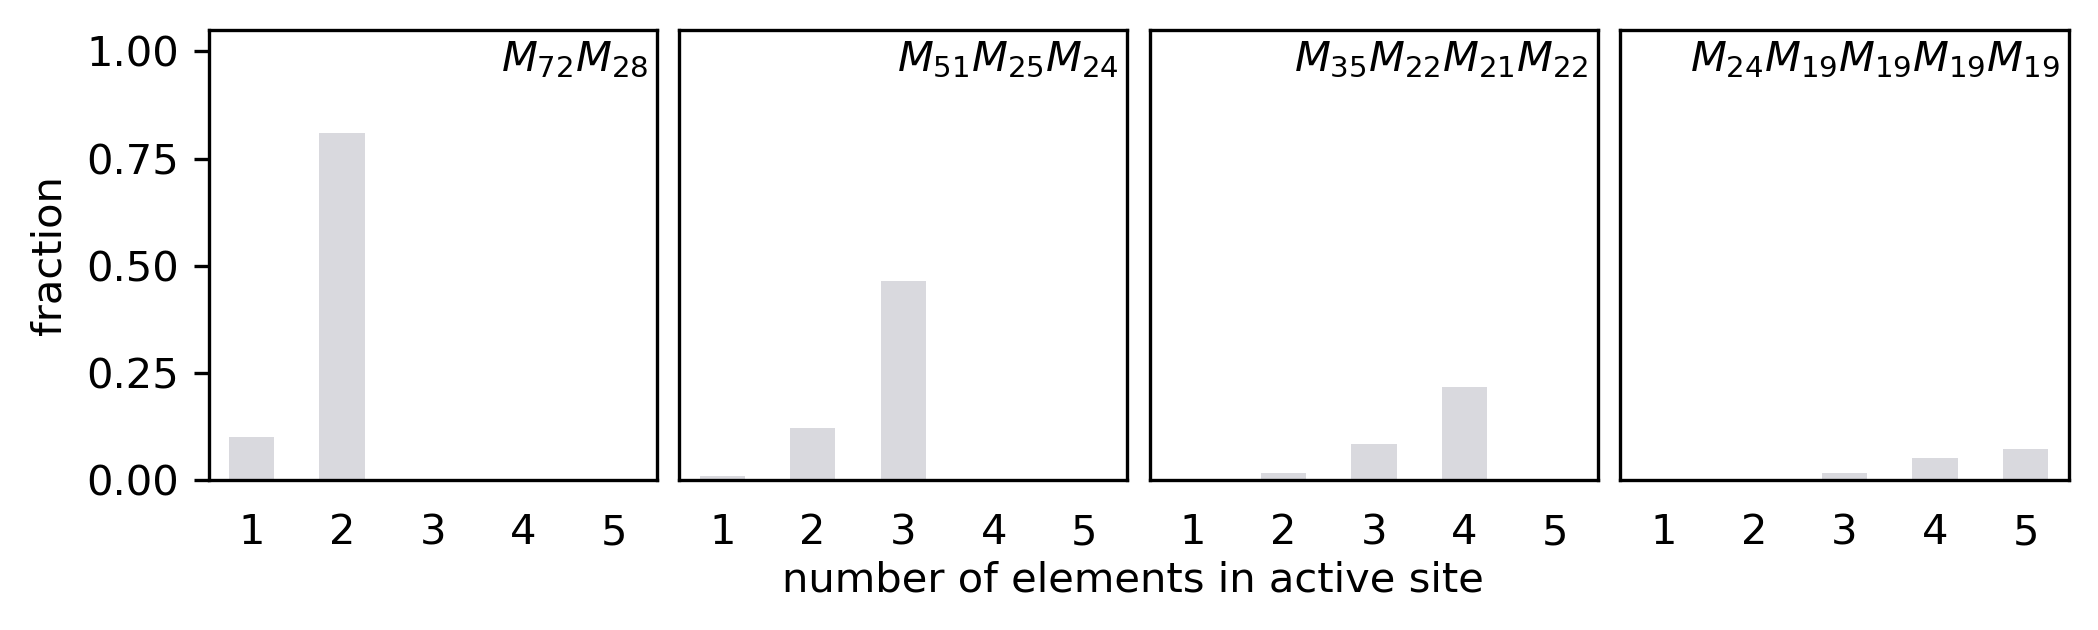

In [7]:
#plot activity distributions
colorscheme = ['#D9D9DE','#20626C','#1BCBDD','#D6D04C','#3CABAD']
labels = ['1','2','3','4','5']

distribution, surfaceloss, break_even_activity = get_break_even_activities(compositions,permutations,0,0.68)

fig, axes = plt.subplots(1,4,figsize=(8,2),sharex=True,sharey=True,dpi=300)

for i,ax in enumerate(fig.axes):
    #make background
    bars = ax.bar(labels, [0,0,0,0,0], color=colorscheme[0],alpha=0.0,width=0.5)

    ax.set_ylim(0,1.05)    
    xlim = plt.gca().get_xlim()

    ax.set_xlim(xlim)
    if(i == 0):
        ax.set_ylabel('fraction')
    else:
        ax.tick_params(axis='y', which='both', length=0, labelrotation=0,pad=8)
    
    ax.tick_params(axis='x', which='both', length=0, labelrotation=0,pad=8)
        
    #plot data
    alloy = str(i+2)+"-alloy"
    frequency = distribution[alloy].to_numpy()
    
    ax.bar(labels, frequency, color=colorscheme[0],width=0.5)
    
    alloy = '$'
    for composition in compositions[i+1]:        
        if(composition > 0):
   
            alloy += "M_{"+str(int(composition*100))+"}"
        
    alloy+='$'
    
    plt.text(0.98,0.98, alloy, horizontalalignment='right',verticalalignment='top',transform = ax.transAxes)

fig.supxlabel('number of elements in active site',y=0,fontsize=10,x=0.51)

plt.subplots_adjust(hspace=0.08, wspace=0.05)
#plt.rcParams.update({'font.size': 22})
#fig.tight_layout()
fig.subplots_adjust(top=0.95,bottom=0.2)
#fig.savefig('distribution.pdf', box_inches='tight')

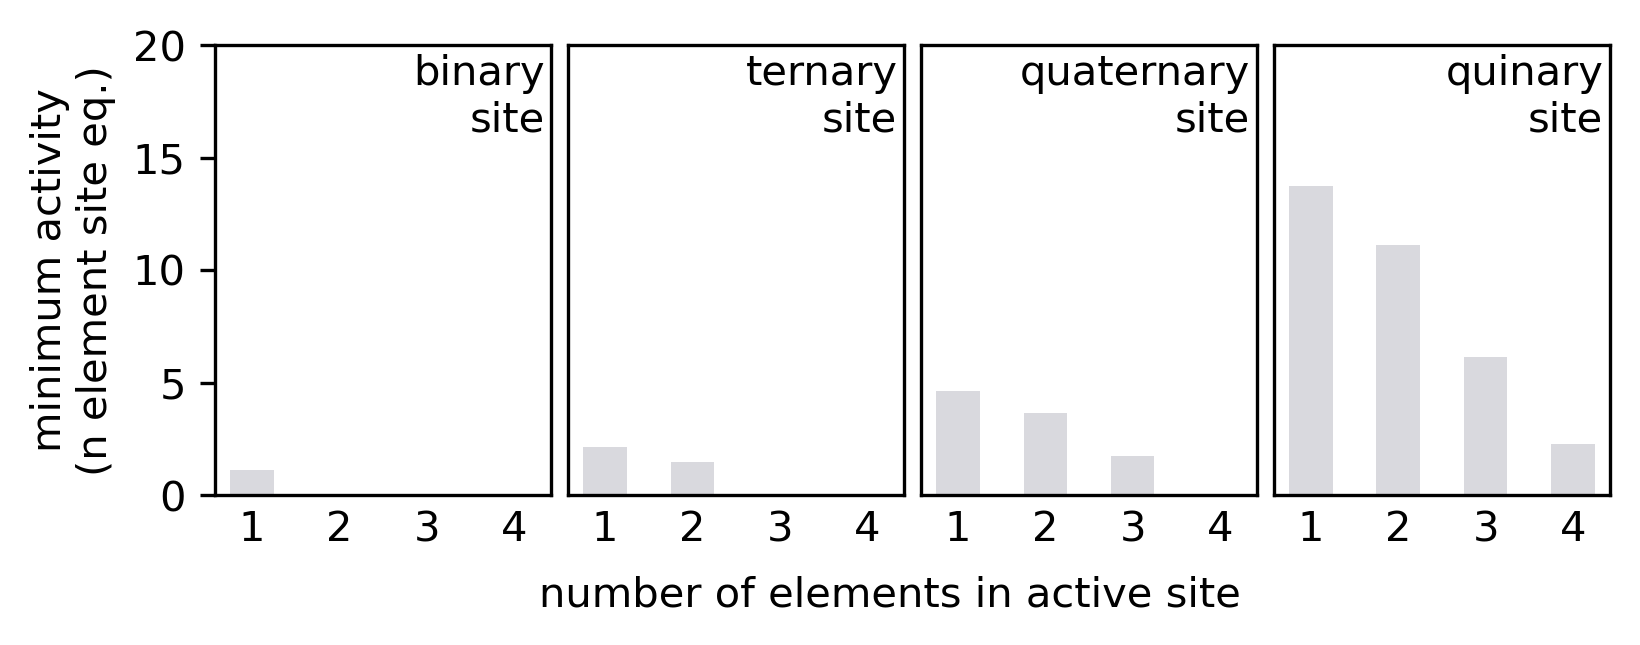

In [8]:
#plot minimum activities

plt.rcParams['text.usetex'] = False
labels = ['1','2','3','4']
site_name=['binary','ternary','quaternary','quinary']

#no need to initialize again but can be done
#distribution, surfaceloss, break_even_activity = get_break_even_activities(compositions,permutations,0,0.68)

fig, axes = plt.subplots(1,4,figsize=(6,2),sharex=True,sharey=True,dpi=300)

for i,ax in enumerate(fig.axes):
    #make background
    
    ax.tick_params(axis='x', which='both', length=0,rotation=0)
    
    if(i == 0):
        ax.set_ylabel('minimum activity\n(n element site eq.)')
    else:
        ax.tick_params(axis='y', which='both', length=0, labelrotation=0,pad=8)
    #plot data
    alloy = str(i+2)+"-alloy"
    frequency = break_even_activity[alloy].to_numpy()
    ax.bar(labels, frequency, color=colorscheme[0],width=0.5)
    
    alloy = site_name[i]+"\nsite"
    plt.text(0.98,0.98, alloy, horizontalalignment='right',verticalalignment='top',transform = ax.transAxes)
    ax.set_ylim(0,20)

fig.supxlabel('number of elements in active site',y=0,fontsize=10)        
plt.subplots_adjust(hspace=0.08, wspace=0.05)
fig.subplots_adjust(top=0.95,bottom=0.2)
#fig.savefig('mina.pdf', box_inches='tight')

# Grid optimizer

In [10]:
#Grid optimizer to search for the most active composition according to Assumption A4
def get_rough_grid(optimal_composition):

    rough_grid = pd.DataFrame(qe.simplex_grid(5, 20)/20, columns=['S1','S2','S3','S4','S5'])

    for i in range(5):
        rough_grid = rough_grid.loc[rough_grid['S'+str(1+i)] >= optimal_composition[i]-0.1]
        rough_grid = rough_grid.loc[rough_grid['S'+str(1+i)] <= optimal_composition[i]+0.1].reset_index(drop=True)

    return rough_grid

def get_fine_grid(optimal_composition):

    fine_grid = pd.DataFrame(qe.simplex_grid(5, 100)/100, columns=['S1','S2','S3','S4','S5'])

    for i in range(5):
        fine_grid = fine_grid.loc[fine_grid['S'+str(1+i)] >= optimal_composition[i]-0.05]
        fine_grid = fine_grid.loc[fine_grid['S'+str(1+i)] <= optimal_composition[i]+0.05].reset_index(drop=True)

    return fine_grid

def optimizer(permutations,degree_optimize,c_dead_surface=0):
    compositions_generator = qe.simplex_grid(5, 10)/10
    
    
    compositions = np.zeros((len(compositions_generator),5))
    compositions = pd.DataFrame(compositions,columns=['composition','2-alloy','3-alloy','4-alloy','5-alloy'])
    
    compositions['composition'] = compositions_generator
    
    composition_opt = [0,0,0,0,0]
    
    if(degree_optimize == 2):

        for n,composition in enumerate(compositions_generator):
            compositions['composition'][n] = str(composition)

            if(composition[0] > 0 and composition[1] > 0):
                compositions['2-alloy'][n] = get_sites_binary_A(composition, permutations, 1)+get_sites_binary_A(composition, permutations, 2)*c_dead_surface

        composition_opt = compositions['composition'][compositions['2-alloy'].idxmax()]
        composition_opt = np.fromstring(composition_opt[1:-1], sep=' ')    

        binary_grid = get_rough_grid(composition_opt)
        binary_grid['frequency'] = 0

        for n, row in binary_grid.iterrows():
            composition = [row['S1'],row['S2'],row['S3'],row['S4'],row['S5']]        
            if(composition[0] > 0 and composition[1] > 0):
                binary_grid['frequency'][n] = get_sites_binary_A(composition, permutations, 1)+get_sites_binary_A(composition, permutations, 2)*c_dead_surface


        maxid = binary_grid['frequency'].idxmax()
        composition_opt = [binary_grid['S1'][maxid],binary_grid['S2'][maxid],binary_grid['S3'][maxid],binary_grid['S4'][maxid],binary_grid['S5'][maxid]]  

        binary_grid = get_fine_grid(composition_opt)
        binary_grid['frequency'] = 0

        for n, row in binary_grid.iterrows():
            composition = [row['S1'],row['S2'],row['S3'],row['S4'],row['S5']]        
            if(composition[0] > 0 and composition[1] > 0):
                binary_grid['frequency'][n] = get_sites_binary_A(composition, permutations, 1)+get_sites_binary_A(composition, permutations, 2)*c_dead_surface


        binary_grid = binary_grid.sort_values(by='frequency', ascending=False)
        composition_opt = binary_grid.head()
        
    if(degree_optimize == 3):

        for n,composition in enumerate(compositions_generator):
            compositions['composition'][n] = str(composition)
            
            if(composition[0] > 0 and composition[1] > 0 and composition[2] > 0):
                compositions['3-alloy'][n] = get_sites_ternary_A(composition, permutations, 1)+get_sites_ternary_A(composition, permutations, 2)*c_dead_surface

        composition_opt = compositions['composition'][compositions['3-alloy'].idxmax()]
        composition_opt = np.fromstring(composition_opt[1:-1], sep=' ')    

        grid = get_rough_grid(composition_opt)
        grid['frequency'] = 0

        for n, row in grid.iterrows():
            composition = [row['S1'],row['S2'],row['S3'],row['S4'],row['S5']]        
            if(composition[0] > 0 and composition[1] > 0):
                grid['frequency'][n] = get_sites_ternary_A(composition, permutations, 1)+get_sites_ternary_A(composition, permutations, 2)*c_dead_surface


        maxid = grid['frequency'].idxmax()
        composition_opt = [grid['S1'][maxid],grid['S2'][maxid],grid['S3'][maxid],grid['S4'][maxid],grid['S5'][maxid]]  

        grid = get_fine_grid(composition_opt)
        grid['frequency'] = 0

        for n, row in grid.iterrows():
            composition = [row['S1'],row['S2'],row['S3'],row['S4'],row['S5']]        
            if(composition[0] > 0 and composition[1] > 0):
                grid['frequency'][n] = get_sites_ternary_A(composition, permutations, 1)+get_sites_ternary_A(composition, permutations, 2)*c_dead_surface

        grid = grid.sort_values(by='frequency', ascending=False)
        composition_opt = grid.head()
        
    if(degree_optimize == 4):

        for n,composition in enumerate(compositions_generator):
            compositions['composition'][n] = str(composition)

            if(composition[0] > 0 and composition[1] > 0 and composition[2] > 0 and composition[3] > 0):
                compositions['4-alloy'][n] = get_sites_quaternary_A(composition, permutations, 1)+get_sites_quaternary_A(composition, permutations, 2)*c_dead_surface

        composition_opt = compositions['composition'][compositions['4-alloy'].idxmax()]
        composition_opt = np.fromstring(composition_opt[1:-1], sep=' ')    

        grid = get_rough_grid(composition_opt)
        grid['frequency'] = 0

        for n, row in grid.iterrows():
            composition = [row['S1'],row['S2'],row['S3'],row['S4'],row['S5']]        
            if(composition[0] > 0 and composition[1] > 0):
                grid['frequency'][n] = get_sites_quaternary_A(composition, permutations, 1)+get_sites_quaternary_A(composition, permutations, 2)*c_dead_surface


        maxid = grid['frequency'].idxmax()
        composition_opt = [grid['S1'][maxid],grid['S2'][maxid],grid['S3'][maxid],grid['S4'][maxid],grid['S5'][maxid]]  

        grid = get_fine_grid(composition_opt)
        grid['frequency'] = 0

        for n, row in grid.iterrows():
            composition = [row['S1'],row['S2'],row['S3'],row['S4'],row['S5']]        
            if(composition[0] > 0 and composition[1] > 0):
                grid['frequency'][n] = get_sites_quaternary_A(composition, permutations, 1)+get_sites_quaternary_A(composition, permutations, 2)*c_dead_surface

        grid = grid.sort_values(by='frequency', ascending=False)
        composition_opt = grid.head()
        
    if(degree_optimize == 5):

        for n,composition in enumerate(compositions_generator):
            compositions['composition'][n] = str(composition)

            if(composition[0] > 0 and composition[1] > 0 and composition[2] > 0 and composition[3] > 0 and composition[4] > 0):
                compositions['5-alloy'][n] = get_sites_quinary_A(composition, permutations, 1)+get_sites_quinary_A(composition, permutations, 2)*c_dead_surface

        composition_opt = compositions['composition'][compositions['5-alloy'].idxmax()]
        composition_opt = np.fromstring(composition_opt[1:-1], sep=' ')    

        grid = get_rough_grid(composition_opt)
        grid['frequency'] = 0

        for n, row in grid.iterrows():
            composition = [row['S1'],row['S2'],row['S3'],row['S4'],row['S5']]        
            if(composition[0] > 0 and composition[1] > 0):
                grid['frequency'][n] = get_sites_quinary_A(composition, permutations, 1)+get_sites_quinary_A(composition, permutations, 2)*c_dead_surface


        maxid = grid['frequency'].idxmax()
        composition_opt = [grid['S1'][maxid],grid['S2'][maxid],grid['S3'][maxid],grid['S4'][maxid],grid['S5'][maxid]]  

        grid = get_fine_grid(composition_opt)
        grid['frequency'] = 0

        for n, row in grid.iterrows():
            composition = [row['S1'],row['S2'],row['S3'],row['S4'],row['S5']]        
            if(composition[0] > 0 and composition[1] > 0):
                grid['frequency'][n] = get_sites_quinary_A(composition, permutations, 1)+get_sites_quinary_A(composition, permutations, 2)*c_dead_surface

        grid = grid.sort_values(by='frequency', ascending=False)
        composition_opt = grid.head()
        
    return composition_opt

optimizer(permutations,2,0.68)        

,S1,S2,S3,S4,S5,frequency
574,0.60,0.40,0.0,0.0,0.0,0.842892
594,0.61,0.39,0.0,0.0,0.0,0.842839
539,0.59,0.41,0.0,0.0,0.0,0.842589
604,0.62,0.38,0.0,0.0,0.0,0.842406
483,0.58,0.42,0.0,0.0,0.0,0.841952


# Bayesian Optimization
Scripts to search for the most active composition based on the statistical model.

In [9]:
#Functions for the Bayesian Optimization

def target_optimize_composition(composition, site_activities, c_effective_surface=0, c_dead_surface=0.68):
    frequency_distribution = get_distributions(composition,permutations)
    frequency_distribution
    activity = 0
    
    #Calculate the activity of a composition assuminga c_dead_surface of 0.68
    c_dead_surface = 0.68
    c_effective_surface = 0
    for i,a in enumerate(site_activities):
        activity += (frequency_distribution['M1_A'][i]+frequency_distribution['M2_A'][i]*c_dead_surface)*a
        activity += (frequency_distribution['M1'][i]-frequency_distribution['M1_A'][i])*a*c_effective_surface
        activity += (frequency_distribution['M2'][i]-frequency_distribution['M2_A'][i])*a*c_effective_surface*c_dead_surface
    return activity

def expected_improvement(X_grid, X_known, gpr, xi=0.01):

    mu, std = gpr.predict(X_grid, return_std=True)
    mu_known = gpr.predict(X_known)
    std = np.ravel(std)

    mu_known_opt = np.max(mu_known)

    temp = mu - mu_known_opt - xi
    Z = temp / std
    
    
    EI = temp * norm.cdf(Z) + std * norm.pdf(Z)
    #print(EI.shape)
    EI[std == 0.0] = 0.0
    
    return EI


In [10]:
#Define parameters to optimize
site_activities = [1,7.6,0,0,48]
c_effective_surface = 0
c_dead_surface = 0.68
n_iterations = 300


In [91]:
#Bayesian Optimization loop
kernel = RBF()+WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

X = np.random.dirichlet((1,1,1,1,1),1)
y = np.array([[target_optimize_composition(X[0],site_activities,c_effective_surface,c_dead_surface)]])


for i in range(n_iterations):
    gpr.fit(X,y.reshape(len(y),))
    
    x = np.random.dirichlet((1,1,1,1,1),20000)
    
    #x = np.random.dirichlet((1,1,1),20000)
    #zeros = np.zeros((20000,2))
    #x = np.hstack((x,zeros))

    EI = expected_improvement(x,X,gpr)

    x = np.round(x[np.argmax(EI)], 2)
    if(i%10==0):
        print(i)
        
    actual = target_optimize_composition(x,site_activities,c_effective_surface,c_dead_surface)
    
    X = np.vstack((X, [x]))
    y = np.vstack((y, actual))

print(X[np.argmax(y)])
print(y[np.argmax(y)])

[0.61 0.39 0.   0.   0.  ]
[8.46075461]
